In [1]:
# check version number
from imblearn.under_sampling import RandomUnderSampler
import imblearn
print(imblearn.__version__)

0.12.2


In [3]:
# load and summarize the dataset
from pandas import read_csv
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url1 = './class1.csv'
url2 = r'C:\Users\Lenovo\OneDrive\Desktop\edp_finally\merge_data_wise_classes\merge_data8\class2.csv'
url3 = r'C:\Users\Lenovo\OneDrive\Desktop\edp_finally\merge_data_wise_classes\merge_data8\class3.csv'
# load the csv file as a data frame
df1 = read_csv(url1, header=None)
df2 = read_csv(url2, header=None)
df3 = read_csv(url3, header=None)


# Concatenate the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

print("df" ,df)
print ("df values", df.values)


df              0        1        2         3       4       5       6       7   \
0        236.85  1.15800  7.31080  -2.39780 -1.1270 -0.5693  2.5513  1.9371   
1        165.08  1.54390 -6.63070 -10.27600  2.9672  3.5359  2.5513  1.9371   
2        308.63  2.57320 -5.15720 -19.52500  2.3973  3.2641  2.7466  1.1484   
3        236.85  0.64331 -1.07680 -27.28900  3.9131  4.5286  2.7466  1.1484   
4        251.21 -2.57320  1.87020 -33.56900  2.9705  3.6528  2.7466  1.1484   
...         ...      ...      ...       ...     ...     ...     ...     ...   
1041128  129.19  3.08790 -3.06030   6.05150  0.5256  1.1013  1.8066  1.6771   
1041129  258.39  3.60250  7.59420  -1.71270 -5.1994 -4.5363  1.8066  1.6771   
1041130  272.74 -1.54390  3.17370   0.22836 -0.1227  0.4858  1.8066  1.6771   
1041131  172.26 -2.18730 -0.68008  -1.59850 -2.3273 -1.7483  1.8066  1.6771   
1041132  172.26 -0.25732 -3.74040  -2.39780  3.8514  4.4624  1.8066  1.6771   

               8         9  10        11  
0    

df              0        1        2         3       4       5       6       7   \
0        236.85  1.15800  7.31080  -2.39780 -1.1270 -0.5693  2.5513  1.9371   
1        165.08  1.54390 -6.63070 -10.27600  2.9672  3.5359  2.5513  1.9371   
2        308.63  2.57320 -5.15720 -19.52500  2.3973  3.2641  2.7466  1.1484   
3        236.85  0.64331 -1.07680 -27.28900  3.9131  4.5286  2.7466  1.1484   
4        251.21 -2.57320  1.87020 -33.56900  2.9705  3.6528  2.7466  1.1484   
...         ...      ...      ...       ...     ...     ...     ...     ...   
1041128  129.19  3.08790 -3.06030   6.05150  0.5256  1.1013  1.8066  1.6771   
1041129  258.39  3.60250  7.59420  -1.71270 -5.1994 -4.5363  1.8066  1.6771   
1041130  272.74 -1.54390  3.17370   0.22836 -0.1227  0.4858  1.8066  1.6771   
1041131  172.26 -2.18730 -0.68008  -1.59850 -2.3273 -1.7483  1.8066  1.6771   
1041132  172.26 -0.25732 -3.74040  -2.39780  3.8514  4.4624  1.8066  1.6771   

               8         9  10        11  
0    

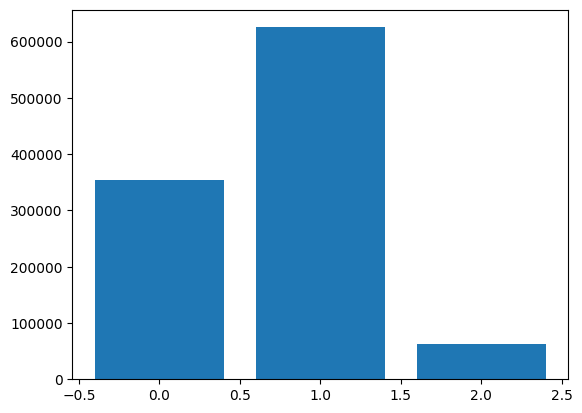

In [4]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location

print ('df',df)
data = df.values
print ('data',data)

feature_indices = [0, 1, 2, 3,11]  # Indices of features (Axial Force, Bending Moment of X, Channel 2, Spindle power,RUL)
target_index = 10  # Index of target variable (Label)

# split into input and output elements
X = df.iloc[:, feature_indices]
y = df.iloc[:, target_index]
print('X',X)
print('Y',y)
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=625430 (33.333%)
Class=1, n=625430 (33.333%)
Class=2, n=625430 (33.333%)


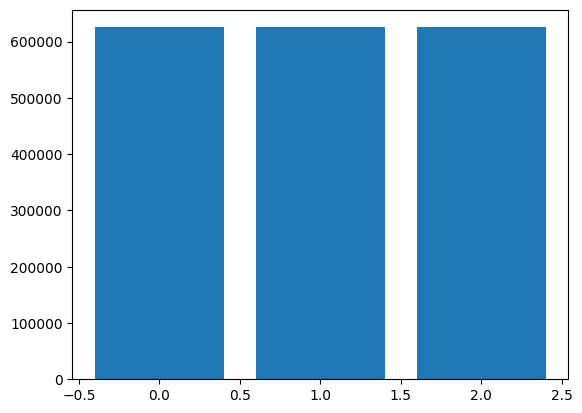

In [6]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [7]:
import numpy as np
# Convert the resampled features and target variable arrays back to a DataFrame
resampled_df = pd.DataFrame(np.column_stack([X, y]), columns=X.columns.tolist() + ['Label'])

# Print the resampled dataset
print("Resampled Dataset:")
print(resampled_df)

# Compare class distribution before and after oversampling
print("\nClass Distribution Before Oversampling:")
print(df[target_index].value_counts())

print("\nClass Distribution After Oversampling:")
print(resampled_df['Label'].value_counts())

Resampled Dataset:
               0         1          2          3           11  Label
0        236.850  1.158000   7.310800  -2.397800  3123.396000    0.0
1        165.080  1.543900  -6.630700 -10.276000  3123.393000    0.0
2        308.630  2.573200  -5.157200 -19.525000  3123.390000    0.0
3        236.850  0.643310  -1.076800 -27.289000  3123.387000    0.0
4        251.210 -2.573200   1.870200 -33.569000  3123.384000    0.0
...          ...       ...        ...        ...          ...    ...
1876285 -143.550 -1.676643 -14.595932  -6.265013   155.227624    2.0
1876286  215.320  0.836029  -2.663520   4.739952   119.890370    2.0
1876287  -43.064 -0.097580   0.411372   1.534155   139.040769    2.0
1876288  -71.774  2.519766 -36.351514  -0.021330   150.776813    2.0
1876289  272.740  1.292225   0.339923   3.269927   142.629638    2.0

[1876290 rows x 6 columns]

Class Distribution Before Oversampling:
10
B    625430
A    353727
C     61976
Name: count, dtype: int64

Class Distribution

In [9]:
resampled_df.to_csv("resampled_data.csv", index=False)